# Закон Кюри-Вейсса
Шмаков Владимир Б04-105

In [14]:
#необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import sympy as smp
from scipy.stats import linregress
from scipy.optimize import curve_fit
import pandas as pd

### Данные, полученные в ходе работы

In [15]:
data_dict = {"tau": [7.97,7.948,7.8615,7.7293,7.5401,7.3387,7.2117,7.1561,7.1130, 7.078, 7.06, 7.038, 7.0322,
       7.0184, 7.0147],
            "T": [14.2,15.07,17.12,19.1,21.09,23.08,25.09,27.07,29.07,31.08,33.06,35.06,37.04,39.03,40],
            "deltaU": [-0.012,-0.015,-0.015,-0.018,-0.02,-0.022,-0.019]+[-0.02 for _ in range(8)]}
#tau - muS
#T - градусы цельсия
#deltaU - миллиВольт
k_n = 24 #коэффициент термопары 
tau0_n = 6.9092 #период колебаний без образца внутри
data_df = pd.DataFrame(data_dict)
tau_n = np.array(data_dict["tau"]) 
TWater_n = np.array(data_dict["T"])
deltaU_n = np.array(data_dict["deltaU"])
data_df

,tau,T,deltaU
0,7.9700,14.20,-0.012
1,7.9480,15.07,-0.015
2,7.8615,17.12,-0.015
3,7.7293,19.10,-0.018
4,7.5401,21.09,-0.020
5,7.3387,23.08,-0.022
6,7.2117,25.09,-0.019
7,7.1561,27.07,-0.020
8,7.1130,29.07,-0.020
9,7.0780,31.08,-0.020


##### Таблица с данными в формате маркдаун

In [16]:
print(data_df.to_markdown())

|    |    tau |     T |   deltaU |
|---:|-------:|------:|---------:|
|  0 | 7.97   | 14.2  |   -0.012 |
|  1 | 7.948  | 15.07 |   -0.015 |
|  2 | 7.8615 | 17.12 |   -0.015 |
|  3 | 7.7293 | 19.1  |   -0.018 |
|  4 | 7.5401 | 21.09 |   -0.02  |
|  5 | 7.3387 | 23.08 |   -0.022 |
|  6 | 7.2117 | 25.09 |   -0.019 |
|  7 | 7.1561 | 27.07 |   -0.02  |
|  8 | 7.113  | 29.07 |   -0.02  |
|  9 | 7.078  | 31.08 |   -0.02  |
| 10 | 7.06   | 33.06 |   -0.02  |
| 11 | 7.038  | 35.06 |   -0.02  |
| 12 | 7.0322 | 37.04 |   -0.02  |
| 13 | 7.0184 | 39.03 |   -0.02  |
| 14 | 7.0147 | 40    |   -0.02  |


In [17]:
from cmath import tau
import dataframe_image as dfi
DataDfStyled = data_df
DataDfStyled = DataDfStyled.rename(columns = {'tau': r"tau [mus]",'T': "T [C]",'deltaU': "deltaU [mV]"})
DataDfStyled = DataDfStyled.style.background_gradient()
dfi.export(DataDfStyled,"experimentData.png")

### Обработка результатов

##### Рассчёт температуры образца

Рассчитаем температуру с учетом показания термопары:$$T = T_{0}+k\cdot \Delta U$$

In [18]:
T_n = TWater_n+k_n*deltaU_n
T_n #температура образца в градусах

array([13.912, 14.71 , 16.76 , 18.668, 20.61 , 22.552, 24.634, 26.59 ,
       28.59 , 30.6  , 32.58 , 34.58 , 36.56 , 38.55 , 39.52 ])

##### Зависимость разности периодов от температуры

$$\operatorname{f}(T) = \frac{1}{\tau^2 - \tau_{0}^2}$$

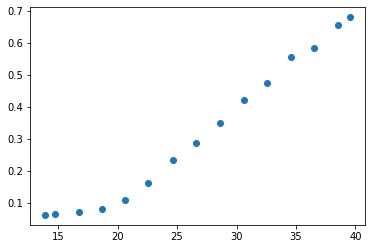

In [19]:
reciprocalDeltaTau_n = 1/(np.power(tau_n,2)-np.power(tau0_n,2))
plt.plot(T_n,reciprocalDeltaTau_n,'o')
plt.show() #график зависимости(промежуточный)

По графику оцениваем, что для экстрополяции не нужно использовать первые 4 точки

In [20]:
notIgnoredDotsRange = [4,len(T_n)]
MNKdata = linregress(T_n[notIgnoredDotsRange[0]:notIgnoredDotsRange[1]],reciprocalDeltaTau_n[notIgnoredDotsRange[0]:notIgnoredDotsRange[1]])
print("Коэффицинет наклона: "+str(MNKdata.slope)+" +/- "+str(MNKdata.stderr))
print("Пересечение с осью y: "+str(MNKdata.intercept)+" +/- "+str(MNKdata.intercept_stderr))

Коэффицинет наклона: 0.030540740299255374 +/- 0.00045574019042779994
Пересечение с осью y: -0.5200805487287352 +/- 0.014175827250592727


Для нахождения парамагнитной точки $\Omega_{p}$ вычислим пересечение интерполяционной кривой с осью $x$

In [21]:
xIntersection = -1*MNKdata.intercept/MNKdata.slope
xIntersectionError = np.sqrt(np.power(MNKdata.intercept_stderr*xIntersection/MNKdata.intercept,2) + np.power(MNKdata.stderr*xIntersection/MNKdata.slope,2))
print("Перечечение с осью x: "+str(xIntersection)+" +/- "+str(xIntersectionError))

Перечечение с осью x: 17.029074725520505 +/- 0.5291688106869881


Нахождение ферромагнитной точки кюри

In [22]:
MNKferro = linregress(T_n[:notIgnoredDotsRange[0]+1],reciprocalDeltaTau_n[:notIgnoredDotsRange[0]+1])
xIntersectionFerro = -1*MNKferro.intercept/MNKferro.slope
xIntersectionFerroError = xIntersectionError*xIntersectionFerro/xIntersection
print("Перечечение с осью x: "+str(xIntersectionFerro)+" +/- "+str(xIntersectionFerroError))

Перечечение с осью x: 4.950418208211354 +/- 0.1538314299435516


Нахождение ферромагниитной точки кюри(нелинейная интерполяция)

In [23]:
def parametricExponent(x: np.ndarray, a: float, b: float, c: float):
    return a*np.exp(x*b)+c
parabolaCff = np.array(curve_fit(f = parametricExponent,
                        xdata = T_n[0:notIgnoredDotsRange[0]],
                        ydata = reciprocalDeltaTau_n[0:notIgnoredDotsRange[0]])[0])
parabolaCff

array([2.36938691e-05, 3.70849129e-01, 5.92396083e-02])

построение графика

In [24]:
xRange = [4,42]
xLine = np.linspace(xRange[0],xRange[1],1000)
yMainLine = xLine*MNKdata.slope+MNKdata.intercept
yErrorLine1 = xLine*(MNKdata.slope+MNKdata.stderr)+MNKdata.intercept+abs(MNKdata.intercept_stderr)
yErrorLine2 = xLine*(MNKdata.slope-MNKdata.stderr)+MNKdata.intercept-abs(MNKdata.intercept_stderr)
yFerro = MNKferro.slope*xLine+MNKferro.intercept

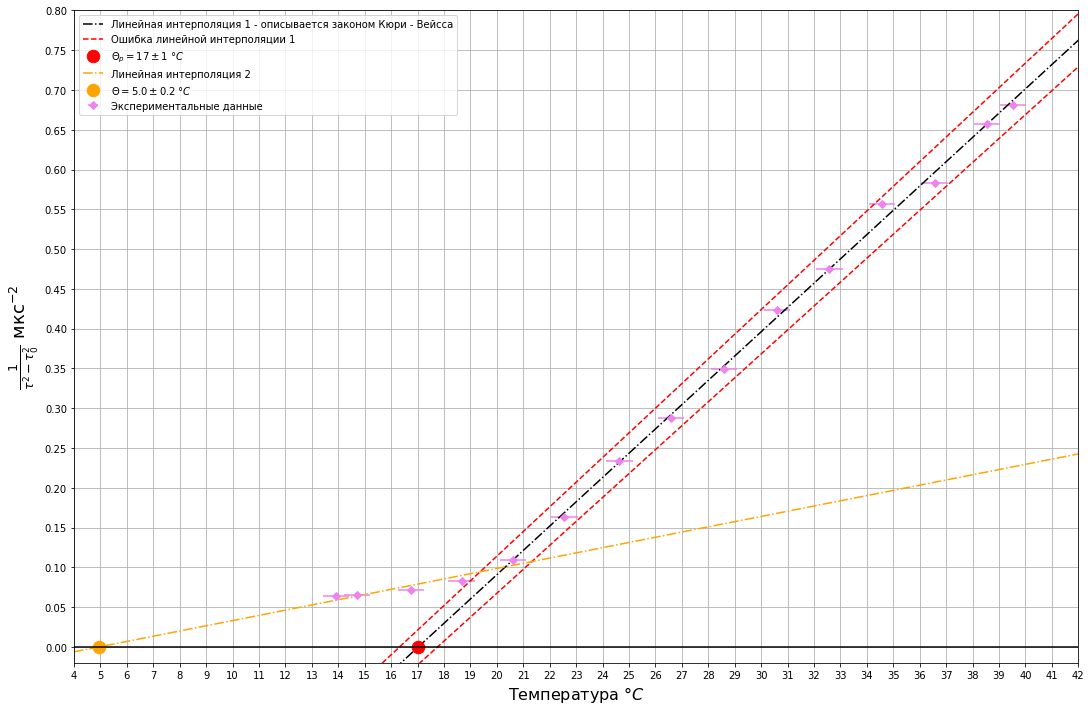

In [25]:
fig,ax = plt.subplots(figsize=(18, 12))

ax.errorbar(T_n,reciprocalDeltaTau_n,xerr = [0.5 for _ in range(len(T_n))],fmt = 'D',label = 'Экспериментальные данные',color = 'violet')
ax.plot(xLine,yMainLine,'-.',label = 'Линейная интерполяция 1 - описывается законом Кюри - Вейсса',color = 'black')
ax.plot(xLine,yErrorLine1,'--',label = "Ошибка линейной интерполяции 1",color = 'red')
ax.plot(xLine,yErrorLine2,'--',color = 'red')
ax.plot([xIntersection],[0],'.', color = 'red',markersize = 25,
            label = "$\Theta_{p} = $"+r"$"+str(round(xIntersection))+"\pm"+str(round(xIntersectionError))+r"\ \degree C$")
ax.plot(xLine,yFerro,'-.',color = 'orange',label = 'Линейная интерполяция 2')
ax.plot([xIntersectionFerro],[0],'.',color = 'orange',label = '$\Theta = $$'+str(round(xIntersectionFerro,1))+" \pm "+str(round(xIntersectionFerroError,1))+"\ \degree C$",markersize = 25)
# ax.plot(xLine,parametricExponent(xLine,*parabolaCff))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='black')
ax.legend()
plt.xlabel("Температура $\degree C$",fontsize=16)
plt.ylabel(r"$\frac{1}{\tau^{2} - \tau_{0}^{2}} $"+r" мкс"+r"$^{-2}$",fontsize=18)

plt.xlim(xRange)
plt.ylim([-0.02,0.8])
xTicksDelta = 1
plt.xticks(np.arange(xRange[0],xRange[1]+xTicksDelta,xTicksDelta))
plt.yticks(np.arange(0,0.8+0.05,0.05))
plt.show()